In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [30]:
SoE = pd.read_csv('/content/2022_2학기 경제학부.csv')
SoBA = pd.read_csv('/content/2022_2학기 경영학부.csv')
DoAS = pd.read_csv('/content/2022_2학기 보험계리학과.csv')

In [43]:
SoE.head()
print(SoE.dtypes)

Untitled 0    float64
날짜             object
내용             object
수입             object
지출             object
잔액             object
사업             object
세부항목           object
영수증            object
Untitled 1     object
dtype: object


In [50]:
SoE.columns = ['Untitled 0', '날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '영수증', 'Untitled 1']
SoE1 = SoE.drop([0, 1, 2])
S_E = SoE1.drop(['Untitled 0', 'Untitled 1'], axis = 1)
S_E = S_E.fillna(0)
S_E['수입'] = S_E['수입'].str.replace(',', '')
S_E['지출'] = S_E['지출'].str.replace(',', '')
S_E['잔액'] = S_E['잔액'].str.replace(',', '')
S_E['수입'] = S_E['수입'].str.replace('\\', '')
S_E['지출'] = S_E['지출'].str.replace(' ₩ ', '')
S_E['잔액'] = S_E['잔액'].str.replace('\ ', '')
S_E



<ipython-input-50-bdd69968a22d>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  S_E['수입'] = S_E['수입'].str.replace('\\', '')
<ipython-input-50-bdd69968a22d>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  S_E['잔액'] = S_E['잔액'].str.replace('\ ', '')


,날짜,내용,수입,지출,잔액,사업,세부항목,영수증
3,0,학생회비 이월,₩ 10119613,NaN,₩10119613,0,0,0
4,2022-06-18,03.19~06.17,₩ 2480,NaN,₩10122093,예금이자,예금이자,△
5,2022-06-30,이단비 토익,NaN,24000,₩10098093,자격증 응시료 지원사업,토익 응시료 지원 24000,△
6,2022-06-30,김도은 한능검,NaN,11000,₩10087093,자격증 응시료 지원사업,한국사 능력검정시험 응시료 지원 11000,△
7,2022-06-30,이동헌 한능검,NaN,11000,₩10076093,자격증 응시료 지원사업,한국사 능력검정시험 응시료 지원 11000,△
...,...,...,...,...,...,...,...,...
83,2022-12-14,맘스터치 (고잔,NaN,528000,₩3163978,2학기 기말고사 야식사업,맘스터치 싸이버거 세트 6600*80,○
84,2022-12-16,쿠팡,NaN,55700,₩3108278,학생회실 비품 구비,코멧 투명 박스테이프 10개 14990\n피스코리아 편한 호치키스 50+리필33호침...,○
85,2022-12-17,09.17~12.16,₩ 1342,NaN,₩3109620,예금이자,예금이자,△
86,2022-12-24,(주)우아한형,NaN,50000,₩3059620,12월 연말사업,배민상품권 10000*5,○


In [6]:
S_eS_SoBA.columns = ['Untitled 0', '날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '영수증']
SoBA1 = SoBA.drop([0, 1, 2])
S_BA = SoBA1.drop('Untitled 0', axis = 1)
S_BA.head()

,날짜,내용,수입,지출,잔액,사업,세부항목,영수증
3,NaN,전월 학생회 이월금,"₩ 16,305,506",NaN,"₩ 16,305,506",전월 학생회비 이월금,전월 학생회비 이월금,NaN
4,2022-07-18,쿠팡와우월회비,NaN,"₩ 4,990","₩ 16,300,516",연결계좌오류,"카드연결계좌 착각 (인터넷 거래 중 개인 계좌와 헷갈려서 결제함, 결산안 시트 11...",△
5,2022-07-20,박유진,NaN,"₩ 10,000","₩ 16,290,516",응시료지원 사업,"박유진 응시료지원 사업 (오픽), (착오 송금으로 5,000원 더 송금, 추후 환불...",△
6,2022-07-20,홍수진,NaN,"₩ 5,000","₩ 16,285,516",응시료지원 사업,홍수진 응시료 지원 사업 (토익),△
7,2022-07-20,옥민희,NaN,"₩ 5,000","₩ 16,280,516",응시료지원 사업,옥민희 응시료지원 사업 (토익),△


In [7]:
DoAS.columns = ['Untitled 0', '날짜', '내용', '수입', '지출', '잔액', '사업', '세부항목', '영수증']
DoAS1 = DoAS.drop([0, 1, 2])
D_AS = DoAS1.drop('Untitled 0', axis = 1)
D_AS.head()

,날짜,내용,수입,지출,잔액,사업,세부항목,영수증
3,NaN,NaN,NaN,NaN,"₩ 4,845,373",NaN,NaN,NaN
4,2022-08-27,이마트 트레이,NaN,"₩ 91,760","₩ 4,753,613",꿈터,"복순도가 손막걸리 10,980*1 + 피지트리 700ml 20,980*1 + 엑스 ...",O
5,2022-08-29,이미지114,NaN,"₩ 11,000","₩ 4,742,613",꿈터,플랜카드 인쇄,O
6,2022-09-02,진다원,NaN,"₩ 2,700","₩ 4,739,913",홍보국 비품 구매,4절 로얄지 900*3,O
7,2022-09-02,현석우,NaN,"₩ 28,500","₩ 4,711,413",꿈터,"로켓단초코롤 1,500*2 + 피카츄치즈케익 1,500*1 + 원소주스피375 12...",O


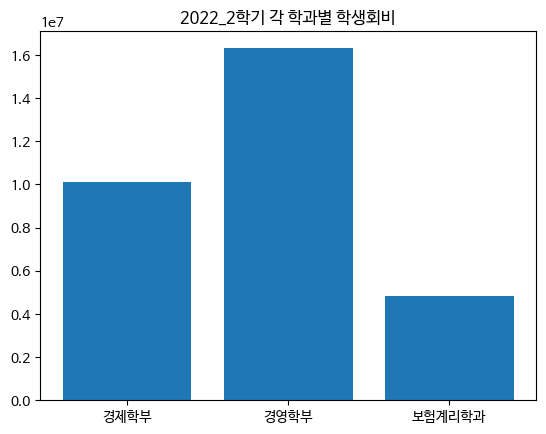

In [52]:
#4
x = np.arange(3)

plt.rc('font', family='NanumBarunGothic') 

department = ['경제학부', '경영학부', '보험계리학과']
values = [10119613, 16305506, 4845373]

plt.title('2022_2학기 각 학과별 학생회비')
plt.bar(x, values)
plt.xticks(x, department)
plt.show()

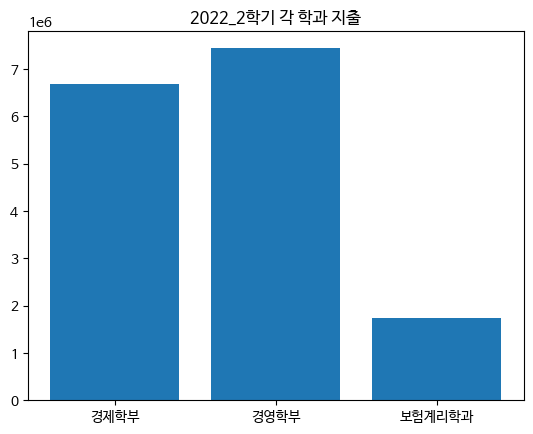

In [9]:
#3
x = np.arange(3)

plt.rc('font', family='NanumBarunGothic') 

department = ['경제학부', '경영학부', '보험계리학과']
values = [6684436, 7440866, 1745924]

plt.title('2022_2학기 각 학과 지출')
plt.bar(x, values)
plt.xticks(x, department)
plt.show()

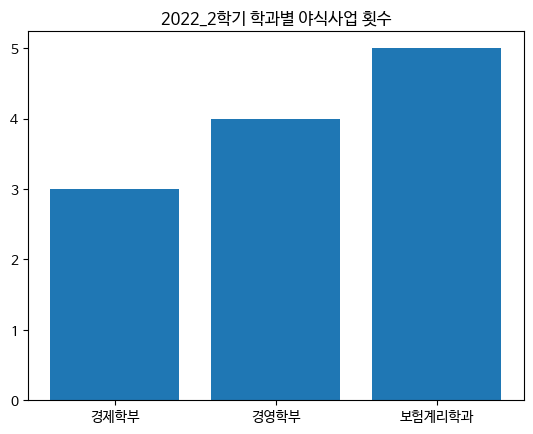

In [51]:
#5
x = np.arange(3)

plt.rc('font', family='NanumBarunGothic') 

department = ['경제학부', '경영학부', '보험계리학과']
values = [3, 4, 5]

plt.title('2022_2학기 학과별 야식사업 횟수')
plt.bar(x, values)
plt.xticks(x, department)
plt.show()

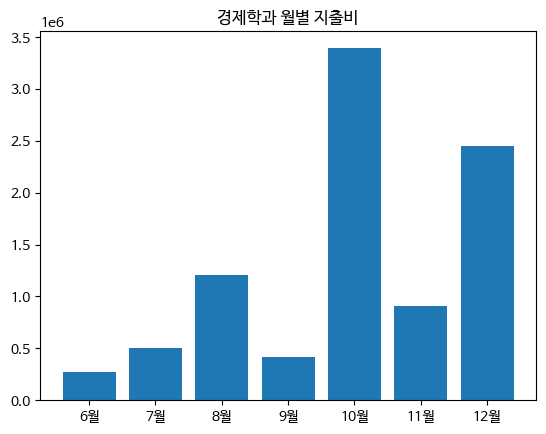

In [10]:
#6
x = np.arange(7)

month = ['6월', '7월', '8월', '9월', '10월', '11월', '12월']
values = [271670, 500900, 1202860, 412550, 3390709, 906900, 2451700]


plt.bar(x, values)
plt.title('경제학과 월별 지출비')
plt.xticks(x, month)
plt.show()

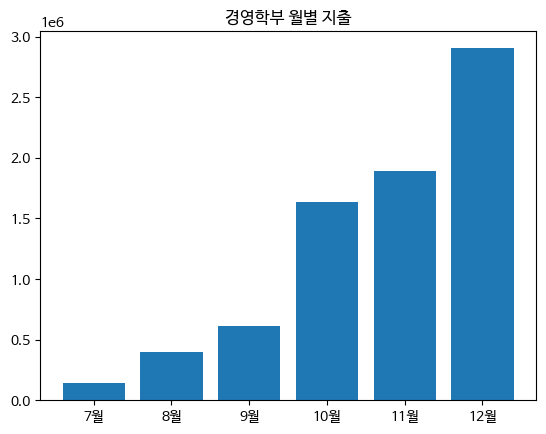

In [13]:
x = np.arange(6)

month = ['7월', '8월', '9월', '10월', '11월', '12월']
values = [139990, 401800, 608610, 1632300, 1894650, 2903140]

plt.bar(x, values)
plt.title('경영학부 월별 지출')
plt.xticks(x, month)
plt.show()

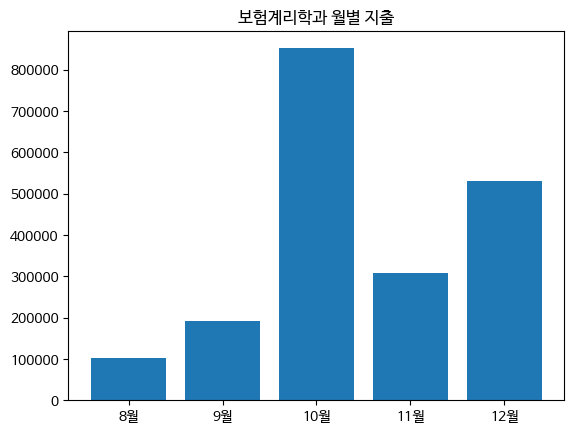

In [12]:
x = np.arange(5)

month = ['8월', '9월', '10월', '11월', '12월']
values = [102760, 191190, 851400, 308000, 530100]

plt.bar(x, values)
plt.title('보험계리학과 월별 지출')
plt.xticks(x, month)
plt.show()